In [1]:
import pandas as pd
import missingno as msno
from datetime import datetime, date

In [2]:
# bring in the kickers dataset as a pandas dataframe
df = pd.read_csv(r"C:\Users\griff\Cloudy-with-a-Chance-of-Football\fixtures\raw_data\NFLBirthdays.csv")

In [3]:
print(df)

            player position team    birthday
0    Derrick Henry       RB  TEN  1994-01-04
1     Alvin Kamara       RB   NO  1995-07-25
2    Davante Adams       WR   GB  1992-12-24
3      Dalvin Cook       RB  MIN  1995-08-10
4      Tyreek Hill       WR   KC  1994-03-01
..             ...      ...  ...         ...
545  Justin Watson       WR   TB  1996-04-04
546       Ian Book       QB   FA  1998-03-30
547   Theo Riddick       RB   LV  1991-05-04
548   Nick Mullens       QB   FA  1995-03-21
549     Jake Fromm       QB  BUF  1998-07-30

[550 rows x 4 columns]


In [4]:
# see how many rows and columns are in this dataset
shape_info = df.shape 
print('This dataset contains {} active player birth dates  based on data from {} columns' 
      .format(shape_info[0], 
              shape_info[1]))

This dataset contains 550 active player birth dates  based on data from 4 columns


In [5]:
# look at first 5 rows of data
df.head()

,player,position,team,birthday
0,Derrick Henry,RB,TEN,1994-01-04
1,Alvin Kamara,RB,NO,1995-07-25
2,Davante Adams,WR,GB,1992-12-24
3,Dalvin Cook,RB,MIN,1995-08-10
4,Tyreek Hill,WR,KC,1994-03-01


In [6]:
# look at last 5 rows of data
df.tail()

,player,position,team,birthday
545,Justin Watson,WR,TB,1996-04-04
546,Ian Book,QB,FA,1998-03-30
547,Theo Riddick,RB,LV,1991-05-04
548,Nick Mullens,QB,FA,1995-03-21
549,Jake Fromm,QB,BUF,1998-07-30


In [7]:
# see list of all columns
list(df)

['player', 'position', 'team', 'birthday']

<AxesSubplot:>

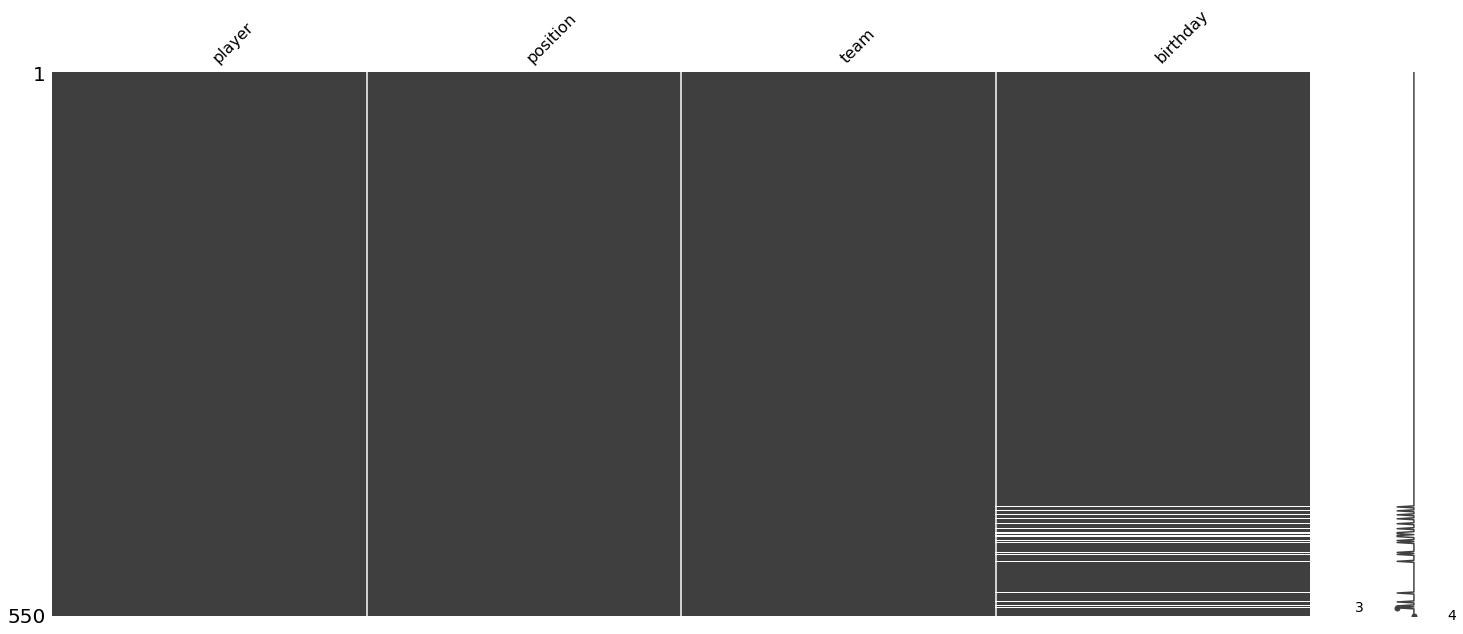

In [8]:
# identify any missing values
msno.matrix(df)

In [9]:
# show rows where birthday column is NaN
pd.set_option('display.max_columns', None)
df[df['birthday'].isna()] 

,player,position,team,birthday
439,Seth Williams,WR,FA,NaN
443,Elijah Mitchell,RB,FA,NaN
447,Khalil Herbert,RB,FA,NaN
451,Marquez Stevenson,WR,FA,NaN
456,Larry Rountree III,RB,FA,NaN
461,Javian Hawkins,RB,FA,NaN
465,Marlon Williams,WR,FA,NaN
466,Hunter Long,TE,FA,NaN
468,Jaelon Darden,WR,FA,NaN
469,Rakeem Boyd,RB,FA,NaN


In [10]:
# create a new dataframe that only includes rows where birthday column is not NaN
df = df[df['birthday'].notna()]

<AxesSubplot:>

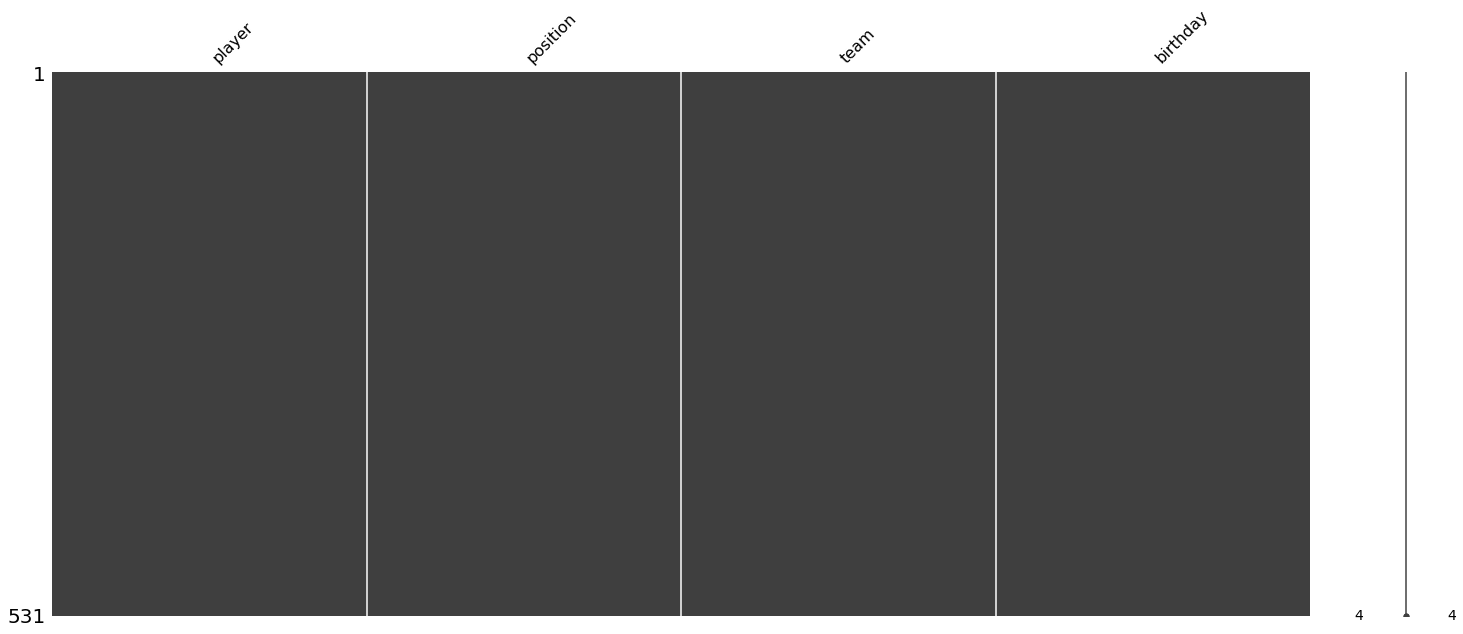

In [11]:
# confirm new dataframe does not contain any missing values
msno.matrix(df)

In [12]:
# review how many rows and columns after removing missing values
shape_info = df.shape 
print('This dataset contains {} active player birth dates  based on data from {} columns' 
      .format(shape_info[0], 
              shape_info[1]))

This dataset contains 531 active player birth dates  based on data from 4 columns


In [13]:
# create a new column named birthyear which pulls the first 4 characters from birthday column
df['birthyear'] = [x[:4] for x in df['birthday']]

In [14]:
print(df)

            player position team    birthday birthyear
0    Derrick Henry       RB  TEN  1994-01-04      1994
1     Alvin Kamara       RB   NO  1995-07-25      1995
2    Davante Adams       WR   GB  1992-12-24      1992
3      Dalvin Cook       RB  MIN  1995-08-10      1995
4      Tyreek Hill       WR   KC  1994-03-01      1994
..             ...      ...  ...         ...       ...
545  Justin Watson       WR   TB  1996-04-04      1996
546       Ian Book       QB   FA  1998-03-30      1998
547   Theo Riddick       RB   LV  1991-05-04      1991
548   Nick Mullens       QB   FA  1995-03-21      1995
549     Jake Fromm       QB  BUF  1998-07-30      1998

[531 rows x 5 columns]


In [15]:
# create a new column named birthmonth which pulls 5:7 characters from birthday column
df['birthmonth'] = [x[5:7] for x in df['birthday']]

In [16]:
df.head(3)

,player,position,team,birthday,birthyear,birthmonth
0,Derrick Henry,RB,TEN,1994-01-04,1994,01
1,Alvin Kamara,RB,NO,1995-07-25,1995,07
2,Davante Adams,WR,GB,1992-12-24,1992,12


In [17]:
# Rename birthday column to birthdate
df.rename(columns={'birthday': 'birthdate'}, inplace=True)

In [18]:
df.head()

,player,position,team,birthdate,birthyear,birthmonth
0,Derrick Henry,RB,TEN,1994-01-04,1994,01
1,Alvin Kamara,RB,NO,1995-07-25,1995,07
2,Davante Adams,WR,GB,1992-12-24,1992,12
3,Dalvin Cook,RB,MIN,1995-08-10,1995,08
4,Tyreek Hill,WR,KC,1994-03-01,1994,03


In [19]:
# create a new column named birthday which pulls 8:10 characters from newly named birthdate column
df['birthday'] = [x[8:10] for x in df['birthdate']]

In [20]:
df.head()

,player,position,team,birthdate,birthyear,birthmonth,birthday
0,Derrick Henry,RB,TEN,1994-01-04,1994,01,04
1,Alvin Kamara,RB,NO,1995-07-25,1995,07,25
2,Davante Adams,WR,GB,1992-12-24,1992,12,24
3,Dalvin Cook,RB,MIN,1995-08-10,1995,08,10
4,Tyreek Hill,WR,KC,1994-03-01,1994,03,01


In [21]:
# create a column named current year and assigne a value of 2021
df['currentyear'] = 2021

In [22]:
df.head()

,player,position,team,birthdate,birthyear,birthmonth,birthday,currentyear
0,Derrick Henry,RB,TEN,1994-01-04,1994,01,04,2021
1,Alvin Kamara,RB,NO,1995-07-25,1995,07,25,2021
2,Davante Adams,WR,GB,1992-12-24,1992,12,24,2021
3,Dalvin Cook,RB,MIN,1995-08-10,1995,08,10,2021
4,Tyreek Hill,WR,KC,1994-03-01,1994,03,01,2021


In [23]:
# check data types to see if any need to be changed
df.dtypes

player         object
position       object
team           object
birthdate      object
birthyear      object
birthmonth     object
birthday       object
currentyear     int64
dtype: object

In [24]:
# changing three columns from objects to integers
df["birthyear"] = df["birthyear"].astype(str).astype(int)
df["birthmonth"] = df["birthmonth"].astype(str).astype(int)
df["birthday"] = df["birthday"].astype(str).astype(int)

In [25]:
df.dtypes

player         object
position       object
team           object
birthdate      object
birthyear       int32
birthmonth      int32
birthday        int32
currentyear     int64
dtype: object

In [26]:
# create a new calculated column named age which is the difference between currentyear and birthyear
df['age'] = df['currentyear'] - df['birthyear']

In [27]:
df.head()

,player,position,team,birthdate,birthyear,birthmonth,birthday,currentyear,age
0,Derrick Henry,RB,TEN,1994-01-04,1994,1,4,2021,27
1,Alvin Kamara,RB,NO,1995-07-25,1995,7,25,2021,26
2,Davante Adams,WR,GB,1992-12-24,1992,12,24,2021,29
3,Dalvin Cook,RB,MIN,1995-08-10,1995,8,10,2021,26
4,Tyreek Hill,WR,KC,1994-03-01,1994,3,1,2021,27


In [28]:
# export data frame to a csv
df.to_csv('NFLBirthdays_cleaned.csv')

In [30]:
# look at avg age by position

df.groupby('position')['age'].mean()


position
K     31.270270
QB    28.314286
RB    25.806667
TE    26.800000
WR    26.036082
Name: age, dtype: float64

In [31]:
# look at avg age by team

df.groupby('team')['age'].mean()


team
ARI    29.083333
ATL    27.538462
BAL    25.846154
BUF    26.705882
CAR    25.818182
CHI    28.166667
CIN    25.909091
CLE    26.200000
DAL    26.272727
DEN    25.416667
DET    27.461538
FA     24.985294
GB     27.571429
HOU    27.529412
IND    27.250000
JAC    27.000000
KC     27.142857
LAC    26.214286
LAR    27.000000
LV     27.333333
MIA    26.150000
MIN    26.300000
NE     26.764706
NO     27.571429
NYG    28.062500
NYJ    26.866667
PHI    26.111111
PIT    26.285714
SEA    26.142857
SF     28.266667
TB     28.866667
TEN    27.750000
WAS    27.315789
Name: age, dtype: float64

In [36]:
# look at summary stats of age to see youngest, oldest, and avg age of player
df['age'].describe()

count    531.000000
mean      26.751412
std        4.020510
min       21.000000
25%       24.000000
50%       26.000000
75%       28.000000
max       49.000000
Name: age, dtype: float64

In [43]:
# who are the 10 oldest active players?
df.sort_values(by=['age']).tail(10)


,player,position,team,birthdate,birthyear,birthmonth,birthday,currentyear,age
132,Ben Roethlisberger,QB,PIT,1982-03-02,1982,3,2,2021,39
287,Ryan Fitzpatrick,QB,WAS,1982-11-24,1982,11,24,2021,39
237,Robbie Gould,K,SF,1982-12-06,1982,12,6,2021,39
542,Jason Witten,TE,LV,1982-05-06,1982,5,6,2021,39
226,Mike Nugent,K,ARI,1982-03-02,1982,3,2,2021,39
165,Philip Rivers,QB,IND,1981-12-08,1981,12,8,2021,40
123,Drew Brees,QB,NO,1979-01-15,1979,1,15,2021,42
96,Tom Brady,QB,TB,1977-08-03,1977,8,3,2021,44
428,Matt Bryant,K,FA,1975-05-29,1975,5,29,2021,46
427,Adam Vinatieri,K,FA,1972-12-28,1972,12,28,2021,49
